In [5]:
#q1
import numpy as np
from collections import Counter

class DecisionTree:
    def fit(self, X, y):
        self.tree = self.fitter(X, y)

    def fitter(self, X, y):
        samples, features = X.shape
        labels = len(np.unique(y))
        max_split = None
        max_gain = 0
        for feature in range(features):
            for threshold in np.unique(X[:, feature]):
                left = y[X[:, feature] < threshold]
                right = y[X[:, feature] >= threshold]
                if len(left) > 0 and len(right) > 0:
                    gain = self.infogain(y,left, right)
                    if gain > max_gain:
                        max_split = (feature, threshold)
                        max_gain = gain

        if max_gain == 0:
            return Counter(y).most_common(1)[0][0]

        feature, threshold = max_split
        left = X[:, feature] < threshold
        right = ~left
        l_tree = self.fitter(X[left], y[left])
        r_tree = self.fitter(X[right], y[right])
        return (feature, threshold, l_tree, r_tree)

    def entropy(self, y):
        _, l = np.unique(y, return_counts=True)
        prob = l / len(y)
        entropy = -np.sum(prob * np.log2(prob))
        return entropy

    def infogain(self, y, left, right):
        p = len(left) / len(y)
        q = len(right) / len(y)
        gain = self.entropy(y) - (p * self.entropy(left) + q * self.entropy(right))
        return gain

    def predict(self, X):
        return [self.predictor(x, self.tree) for x in X]

    def predictor(self, x, tree):
        if isinstance(tree, int) or isinstance(tree, float) or isinstance(tree, np.int64):
            return tree
        feature= tree[0]
        threshold= tree[1]
        left= tree[2] 
        right = tree[3]
        if x[feature] < threshold:
            return self.predictor(x, left)
        else:
            return self.predictor(x, right)

xtrain = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
ytrain = np.array([0, 0, 1, 1])

tree = DecisionTree()
tree.fit(xtrain, ytrain)

X_test = np.array([[4, 3], [1, 2]])
predictions = tree.predict(X_test)
print("Array of prediction is")
print(predictions)


Array of prediction is
[1, 0]


In [159]:
#2.3
import numpy as np
from collections import Counter

data = np.loadtxt("Druns.txt")

X = data[:, :-1]
y = data[:, -1]   

def entropy(y):
    _, n = np.unique(y, return_counts=True)
    prob = n / len(y)
    return -np.sum(prob * np.log2(prob + 1e-10))

H = entropy(y)

cuts = []
ig_ratios = []

for feature_i in range(X.shape[1]):
    feature_values = X[:, feature_i]
    unique_values = np.unique(feature_values)

    for threshold in unique_values:
        l = np.where(feature_values < threshold)
        r = np.where(feature_values >= threshold)
        H_left = entropy(y[l])
        H_right = entropy(y[r])

        Infogain = H - (len(l[0]) / len(y) * H_left + len(r[0]) / len(y) * H_right)

        Ig_ratio = Infogain / (entropy(feature_values)+ 1e-10)

        cuts.append((feature_i, threshold))
        ig_ratios.append(Ig_ratio)

        print(f"Cut: Feature {feature_i}, Threshold {threshold}")
        print(f"Information Gain: {Infogain}")
        print(f"Information Gain Ratio: {Ig_ratio}")
        print("\n")

Cut: Feature 0, Threshold 0.0
Information Gain: 0.0
Information Gain Ratio: 0.0


Cut: Feature 0, Threshold 0.1
Information Gain: 0.04417739185414593
Information Gain Ratio: 0.10051807677349751


Cut: Feature 1, Threshold -2.0
Information Gain: 0.0
Information Gain Ratio: 0.0


Cut: Feature 1, Threshold -1.0
Information Gain: 0.04417739185414593
Information Gain Ratio: 0.012770130108984938


Cut: Feature 1, Threshold 0.0
Information Gain: 0.03827452220629268
Information Gain Ratio: 0.011063818118717686


Cut: Feature 1, Threshold 1.0
Information Gain: 0.004886164091842837
Information Gain Ratio: 0.0014124181751763482


Cut: Feature 1, Threshold 2.0
Information Gain: 0.0010821659130776373
Information Gain Ratio: 0.0003128161018453832


Cut: Feature 1, Threshold 3.0
Information Gain: 0.016313165825732168
Information Gain Ratio: 0.004715562448137058


Cut: Feature 1, Threshold 4.0
Information Gain: 0.04945207278939401
Information Gain Ratio: 0.01429485483807007


Cut: Feature 1, Threshold

In [135]:
#2.4

import numpy as np
from collections import Counter

data = np.loadtxt("D3Leaves.txt")

# Extract features and labels
X = data[:, :-1]  # Features
y = data[:, -1]   # Labels

class DecisionTree:
    def fit(self, X, y):
        self.tree = self.fitter(X, y)

    def fitter(self, X, y):
        samples, features = X.shape
        labels = len(np.unique(y))
        max_split = None
        max_gain = 0
        for feature in range(features):
            for threshold in np.unique(X[:, feature]):
                left = y[X[:, feature] < threshold]
                right = y[X[:, feature] >= threshold]
                if len(left) > 0 and len(right) > 0:
                    gain = self.infogain(y,left, right)
                    if gain > max_gain:
                        max_split = (feature, threshold)
                        max_gain = gain

        if max_gain == 0:
            return Counter(y).most_common(1)[0][0]

        feature, threshold = max_split
        left = X[:, feature] < threshold
        right = ~left
        l_tree = self.fitter(X[left], y[left])
        r_tree = self.fitter(X[right], y[right])
        return (feature, threshold, l_tree, r_tree)

    def entropy(self, y):
        _, l = np.unique(y, return_counts=True)
        prob = l / len(y)
        entropy = -np.sum(prob * np.log2(prob))
        return entropy

    def infogain(self, y, left, right):
        p = len(left) / len(y)
        q = len(right) / len(y)
        gain = self.entropy(y) - (p * self.entropy(left) + q * self.entropy(right))
        return gain

    def predict(self, X):
        return [self.predictor(x, self.tree) for x in X]

    def predictor(self, x, tree):
        if isinstance(tree, int) or isinstance(tree, float) or isinstance(tree, np.int64):
            return tree
        feature= tree[0]
        threshold= tree[1]
        left= tree[2] 
        right = tree[3]
        if x[feature] < threshold:
            return self.predictor(x, left)
        else:
            return self.predictor(x, right)

xtrain = X
ytrain = y

tree = DecisionTree()
tree.fit(xtrain, ytrain)

X_test = np.array([[4, 3], [1, 2]])
predictions = tree.predict(X_test)
print("Array of prediction is")
print(predictions)

#The tree will have following set of logic rules:
# If Feature 1 <= 5.5 and Feature 2 <= 2 then class 0
# If Feature 1 <= 5.5 and Feature 2 > 2 then class 1
# If Feature 1 > 5.5 then class 1


Array of prediction is
[1.0, 0.0]


In [133]:
#2.5
import numpy as np
from collections import Counter

data = np.loadtxt("D1.txt")
X = data[:, :-1]  
y = data[:, -1]  
class DecisionTree:
    def fit(self, X, y):
        self.tree = self.fitter(X, y)

    def fitter(self, X, y):
        samples, features = X.shape
        labels = len(np.unique(y))
        max_split = None
        max_gain = 0
        for feature in range(features):
            for threshold in np.unique(X[:, feature]):
                left = y[X[:, feature] < threshold]
                right = y[X[:, feature] >= threshold]
                if len(left) > 0 and len(right) > 0:
                    gain = self.infogain(y,left, right)
                    if gain > max_gain:
                        max_split = (feature, threshold)
                        max_gain = gain

        if max_gain == 0:
            return Counter(y).most_common(1)[0][0]

        feature, threshold = max_split
        left = X[:, feature] < threshold
        right = ~left
        l_tree = self.fitter(X[left], y[left])
        r_tree = self.fitter(X[right], y[right])
        return (feature, threshold, l_tree, r_tree)

    def entropy(self, y):
        _, l = np.unique(y, return_counts=True)
        prob = l / len(y)
        entropy = -np.sum(prob * np.log2(prob))
        return entropy

    def infogain(self, y, left, right):
        p = len(left) / len(y)
        q = len(right) / len(y)
        gain = self.entropy(y) - (p * self.entropy(left) + q * self.entropy(right))
        return gain

    def predict(self, X):
        return [self.predictor(x, self.tree) for x in X]

    def predictor(self, x, tree):
        if isinstance(tree, int) or isinstance(tree, float) or isinstance(tree, np.int64):
            return tree
        feature= tree[0]
        threshold= tree[1]
        left= tree[2] 
        right = tree[3]
        if x[feature] < threshold:
            return self.predictor(x, left)
        else:
            return self.predictor(x, right)
    def print_tree(self, node,features=None,classes=None, space=""):
        if isinstance(node, int) or isinstance(node,float):
            classname = classes[node] if classes else node
            print(space + "Predict", classname)
            return
        if features is None:
            feature = f"Feature {node[0]}"
        else:
            feature = features[node[0]]
        print(space + f"[{feature} < {node[1]}]")
        print(space + '--> True:')
        self.print_tree(node[2], features,classes, space+ "  ")
        print(space + '--> False:')
        self.print_tree(node[3], features,classes, space+ "  ")
        
X_train = X
y_train = y

tree = DecisionTree()
tree.fit(X_train, y_train)
feature_names=["Feature 1", "Feature 2"]
print("Tree for D!")
tree.print_tree(tree.tree, feature_names)

data = np.loadtxt("D2.txt")
X = data[:, :-1]  
y = data[:, -1]  

X_train = X
y_train = y
print("\n\n")
tree = DecisionTree()
tree.fit(X_train, y_train)
feature_names=["Feature 1", "Feature 2"]
print("Tree for D2")
tree.print_tree(tree.tree, feature_names)

Tree for D!
[Feature 2 < 0.201829]
--> True:
  Predict 0.0
--> False:
  Predict 1.0



Tree for D2
[Feature 1 < 0.533076]
--> True:
  [Feature 2 < 0.639018]
  --> True:
    [Feature 2 < 0.534979]
    --> True:
      Predict 0.0
    --> False:
      [Feature 1 < 0.409972]
      --> True:
        Predict 0.0
      --> False:
        [Feature 1 < 0.426073]
        --> True:
          [Feature 1 < 0.417579]
          --> True:
            Predict 1.0
          --> False:
            Predict 0.0
        --> False:
          Predict 1.0
  --> False:
    [Feature 1 < 0.111076]
    --> True:
      [Feature 2 < 0.964767]
      --> True:
        Predict 0.0
      --> False:
        Predict 1.0
    --> False:
      [Feature 2 < 0.861]
      --> True:
        [Feature 1 < 0.33046]
        --> True:
          [Feature 2 < 0.745406]
          --> True:
            Predict 0.0
          --> False:
            [Feature 1 < 0.254049]
            --> True:
              [Feature 1 < 0.191915]
          

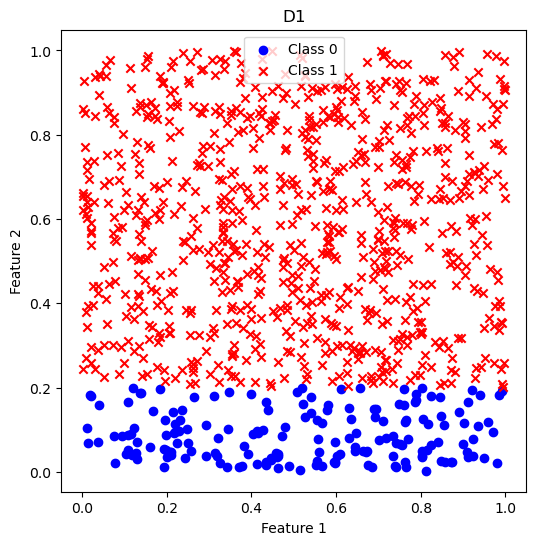

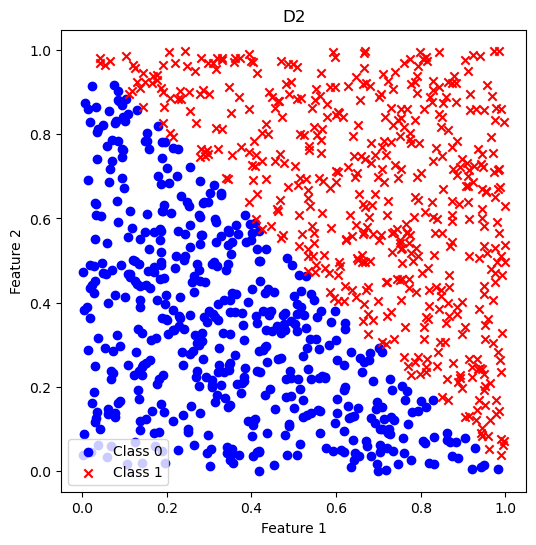

In [35]:
#2.6
import numpy as np
import matplotlib.pyplot as plt

d1 = np.loadtxt("D1.txt")
d2 = np.loadtxt("D2.txt")

X_d1, y_d1 = d1[:, :-1], d1[:, -1]
X_d2, y_d2 = d2[:, :-1], d2[:, -1]

plt.figure(figsize=(6, 6))
plt.scatter(X_d1[y_d1 == 0, 0], X_d1[y_d1 == 0, 1], label="Class 0", c="blue", marker="o")
plt.scatter(X_d1[y_d1 == 1, 0], X_d1[y_d1 == 1, 1], label="Class 1", c="red", marker="x")
plt.title("D1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_d2[y_d2 == 0, 0], X_d2[y_d2 == 0, 1], label="Class 0", c="blue", marker="o")
plt.scatter(X_d2[y_d2 == 1, 0], X_d2[y_d2 == 1, 1], label="Class 1", c="red", marker="x")
plt.title("D2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

#The decision tree is complex for D2 than D1 because there is a easy split that can happen in D1 because of the
#straight line with slope=0, which can easily represent something above Feature is class 0 and otherwise class 1.
#But if we look at D2 the line has some slope, at every Feature 2 there is a different Feature 1, causing the 
#tree to become complex. 

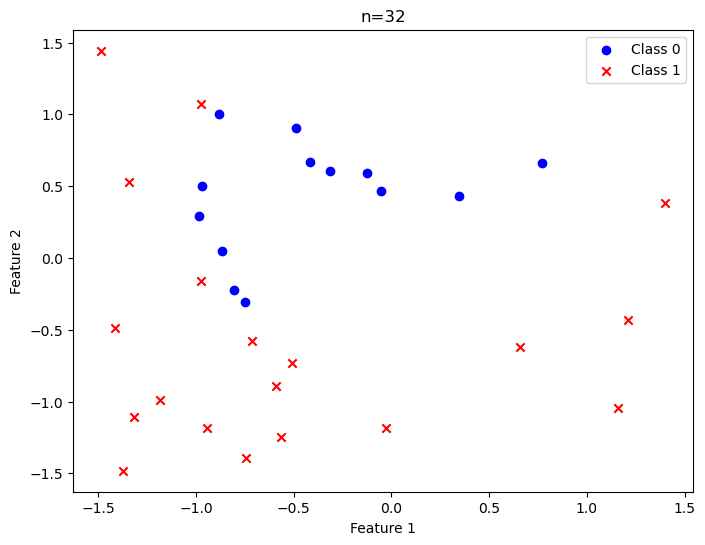

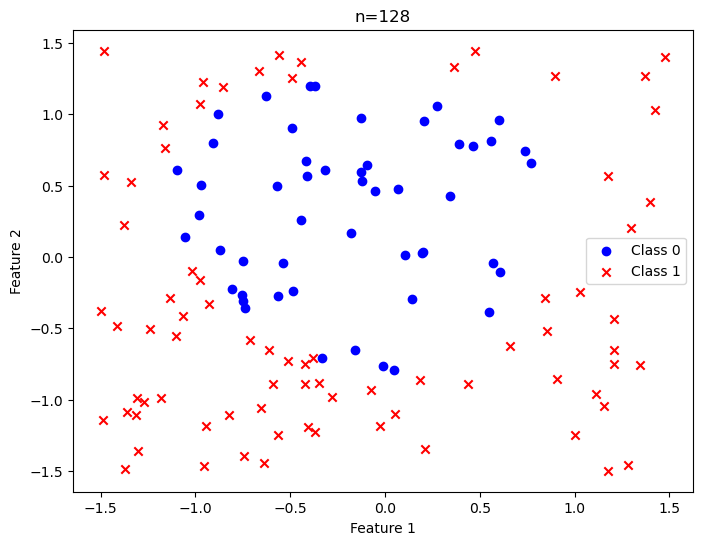

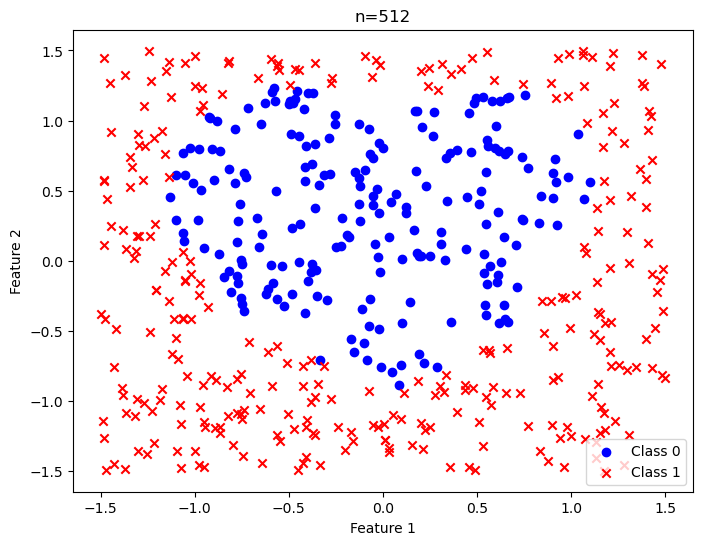

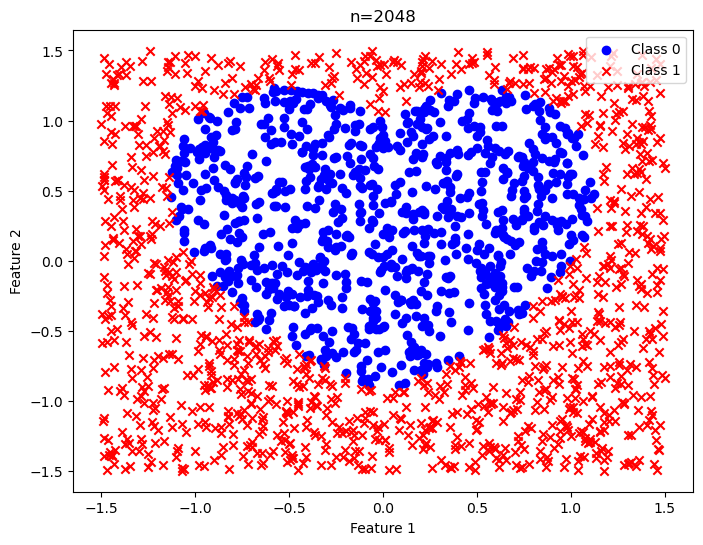

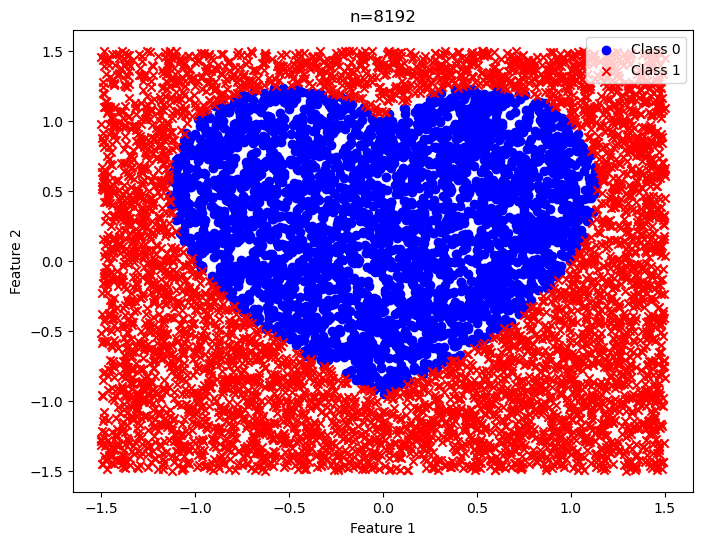

n = 32, Nodes = 11, Test Error = 0.2583
n = 128, Nodes = 25, Test Error = 0.1117
n = 512, Nodes = 45, Test Error = 0.0548
n = 2048, Nodes = 127, Test Error = 0.0265
n = 8192, Nodes = 233, Test Error = 0.0122


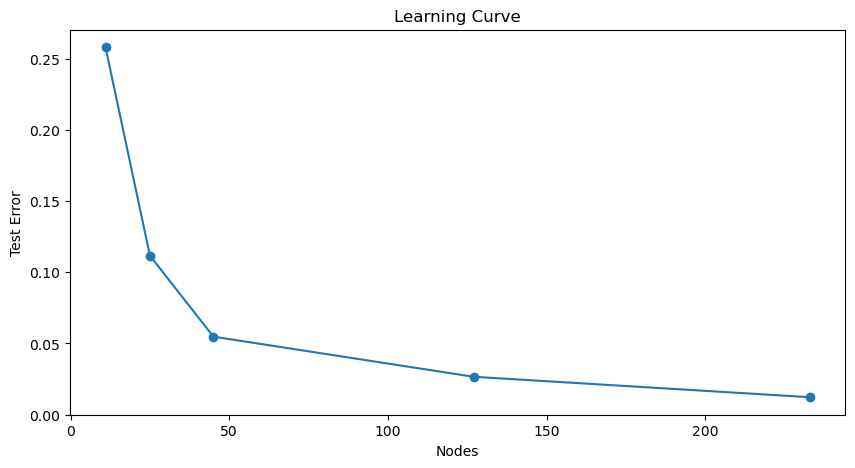

In [104]:
#2.7
import numpy as np
from collections import Counter

data = np.loadtxt("Dbig.txt")

np.random.seed(7)
np.random.shuffle(data)

train_size = 8192
train_set = data[:train_size]
test_set = data[train_size:]

class DecisionTree:
    def fit(self, X, y):
        self.tree = self.fitter(X, y)

    def fitter(self, X, y):
        samples, features = X.shape
        labels = len(np.unique(y))
        max_split = None
        max_gain = 0
        for feature in range(features):
            for threshold in np.unique(X[:, feature]):
                left = y[X[:, feature] < threshold]
                right = y[X[:, feature] >= threshold]
                if len(left) > 0 and len(right) > 0:
                    gain = self.infogain(y,left, right)
                    if gain > max_gain:
                        max_split = (feature, threshold)
                        max_gain = gain

        if max_gain == 0:
            return Counter(y).most_common(1)[0][0]

        feature, threshold = max_split
        left = X[:, feature] < threshold
        right = ~left
        l_tree = self.fitter(X[left], y[left])
        r_tree = self.fitter(X[right], y[right])
        return (feature, threshold, l_tree, r_tree)

    def entropy(self, y):
        _, l = np.unique(y, return_counts=True)
        prob = l / len(y)
        entropy = -np.sum(prob * np.log2(prob))
        return entropy

    def infogain(self, y, left, right):
        p = len(left) / len(y)
        q = len(right) / len(y)
        gain = self.entropy(y) - (p * self.entropy(left) + q * self.entropy(right))
        return gain

    def predict(self, X):
        return [self.predictor(x, self.tree) for x in X]

    def predictor(self, x, tree):
        if isinstance(tree, int) or isinstance(tree, float) or isinstance(tree, np.int64):
            return tree
        feature= tree[0]
        threshold= tree[1]
        left= tree[2] 
        right = tree[3]
        if x[feature] < threshold:
            return self.predictor(x, left)
        else:
            return self.predictor(x, right)
    def print_tree(self, node,features=None,classes=None, space=""):
        if isinstance(node, int) or isinstance(node,float):
            classname = classes[node] if classes else node
            print(space + "Predict", classes)
            return
        if features is None:
            feature = f"Feature {node[0]}"
        else:
            feature = features[node[0]]
        print(space + f"[{feature} < {node[1]}]")
        print(space + '--> True:')
        self.print_tree(node[2], features,classes, space+ "  ")
        print(space + '--> False:')
        self.print_tree(node[3], features,classes, space+ "  ")
    def node_count(self, node):
        if isinstance(node, int) or isinstance(node,float):
            return 1  # Leaf node
        else:
            feature, _, l, r = node
            left_count = self.node_count(l)
            right_count = self.node_count(r)
            return 1 + left_count + right_count
        
n_values = [32, 128, 512, 2048, 8192]
num_nodes = []
test_errors = [] 

def accuracy_score(y_true, y_pred):
    correct_predictions = 0
    total_samples = len(y_true)

    for true_label, predicted_label in zip(y_true, y_pred):
        if true_label == predicted_label:
            correct_predictions += 1

    accuracy = correct_predictions / total_samples

    return accuracy

for n in n_values:
    train_data = train_set[:n]
    X_train, y_train = train_data[:, :-1], train_data[:, -1]

    tree = DecisionTree()
    tree.fit(X_train, y_train)
    

    num_nodes.append(tree.node_count(tree.tree))

    y_pred = tree.predict(test_set[:, :-1]) 
    test_error = 1 - accuracy_score(test_set[:, -1], y_pred) 
    test_errors.append(test_error)
    X_d1, y_d1 = train_data[:, :-1], train_data[:, -1]
    plt.figure(figsize=(8, 6))
    plt.scatter(X_d1[y_d1 == 0, 0], X_d1[y_d1 == 0, 1], label="Class 0", c="blue", marker="o")
    plt.scatter(X_d1[y_d1 == 1, 0], X_d1[y_d1 == 1, 1], label="Class 1", c="red", marker="x")
    plt.title("n="+str(n))
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

for i in range(len(n_values)):
    print(f"n = {n_values[i]}, Nodes = {num_nodes[i]}, Test Error = {test_errors[i]:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(num_nodes, test_errors, marker='o')
plt.title("Learning Curve")
plt.xlabel("Nodes")
plt.ylabel("Test Error")
plt.show()



Results:
n = 32, Nodes = 11, Test Error = 0.2001
n = 128, Nodes = 25, Test Error = 0.1174
n = 512, Nodes = 53, Test Error = 0.0543
n = 2048, Nodes = 131, Test Error = 0.0218
n = 8192, Nodes = 241, Test Error = 0.0100


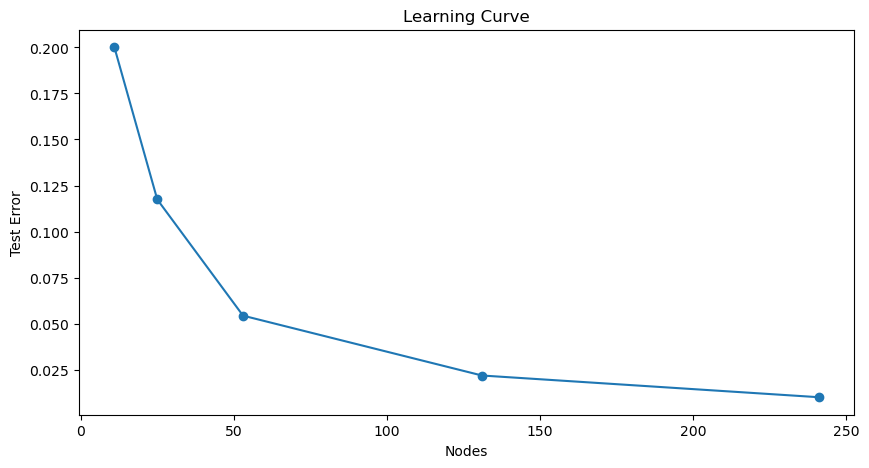

In [53]:
#3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = np.loadtxt("Dbig.txt")

np.random.seed(7)
np.random.shuffle(data)

n_nodes = []
t_errors = [] 

n_values = [32, 128, 512, 2048, 8192]

for n in n_values:
    train_data = data[:n]
    X_train, y_train = train_data[:, :-1], train_data[:, -1]

    tree = DecisionTreeClassifier(random_state=7)
    tree.fit(X_train, y_train)

    n_nodes.append(tree.tree_.node_count)

    X_test, y_test = data[n:, :-1], data[n:, -1]
    y_pred = tree.predict(X_test)
    t_error = 1 - accuracy_score(y_test, y_pred)
    t_errors.append(t_error)

print("Results:")
for i in range(len(n_values)):
    print(f"n = {n_values[i]}, Nodes = {n_nodes[i]}, Test Error = {t_errors[i]:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(n_nodes, t_errors, marker='o')
plt.title("Learning Curve")
plt.xlabel("Nodes")
plt.ylabel("Test Error")
plt.show()


Training error:(log) 148.41678747225407
Testing error: (log) 145.0787512782556

Train Error (log) (Std Dev 0.1): 148.4401412766105
Test Error (log)(Std Dev 0.1): 144.0893662936505

Train Error (log) (Std Dev 0.3): 149.36550676240515
Test Error (log)(Std Dev 0.3): 145.98655268528108

Train Error (log) (Std Dev 0.5): 150.77392587479318
Test Error (log)(Std Dev 0.5): 144.480339955504

Train Error (log) (Std Dev 0.7): 146.18098047030858
Test Error (log)(Std Dev 0.7): 135.29554768223895

Train Error (log) (Std Dev 1.0): 134.98338253189885
Test Error (log)(Std Dev 1.0): 123.47199414916793


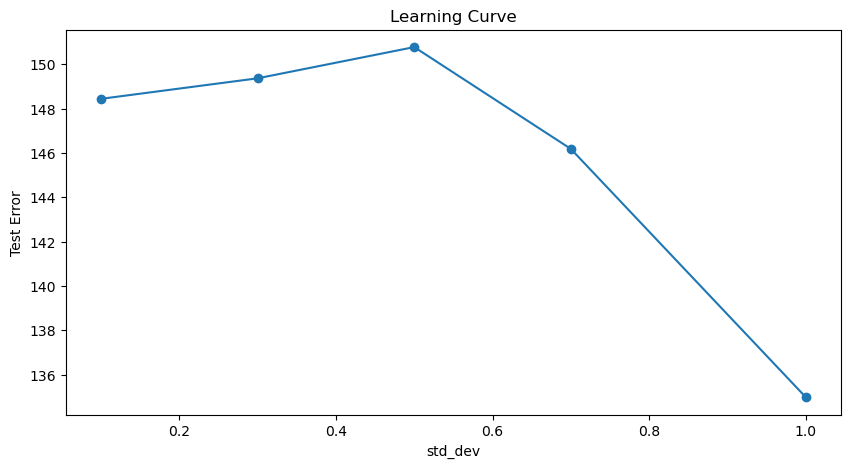

In [182]:
#q4
#for 100 points in lagrange
import numpy as np
from scipy.interpolate import lagrange
from sklearn.metrics import mean_squared_error
from numpy.polynomial.polynomial import Polynomial

a, b, n = 0, 2*np.pi, 100

x_train = np.random.uniform(a, b, n)
y_train = np.sin(x_train)
model = lagrange(x_train, y_train)

x_test = np.random.uniform(a, b, 25)
y_test = np.sin(x_test)

y_train_pred = model(x_train)
y_test_pred = model(x_test)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f'Training error:(log) {np.log10(train_error)}')
print(f'Testing error: (log) {np.log10(test_error)}')

train_errors=[]
test_errors=[]
for std_dev in [0.1, 0.3, 0.5, 0.7, 1.0]:
    xn_train = x_train + np.random.normal(0, std_dev, n)
    yn_train = np.sin(xn_train)

    nlagrange = lagrange(xn_train, yn_train)

    yn_train_pred = nlagrange(xn_train)
    yn_test_pred = nlagrange(x_test)

    ntrain_error = mean_squared_error(yn_train, yn_train_pred)
    ntest_error = mean_squared_error(y_test, yn_test_pred)
    train_errors.append(np.log10(ntrain_error))
    test_errors.append(ntest_error)
    print(f"\nTrain Error (log) (Std Dev {std_dev}): {np.log10(ntrain_error)}")
    print(f"Test Error (log)(Std Dev {std_dev}): {np.log10(ntest_error)}")
plt.figure(figsize=(10, 5))
plt.plot([0.1,0.3,0.5,0.7,1.0],train_errors , marker='o')
plt.title("Learning Curve")
plt.xlabel("std_dev")
plt.ylabel("Test Error")
plt.show()
